<a href="https://colab.research.google.com/github/JLALLANOSM/Sis420_LlanosMendoza/blob/main/ExamenFinal2023/RNExamenFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#LIBRERIAS



In [2]:
#NUMPY - arreglo multidimensional
import numpy as np

#PANDAS - manipulación eficiente de datos.
import pandas as pd

#MatPlotlib - Crear gráficos y visualizaciones.
import matplotlib.pyplot as plt

#Modulo Random - Generación de números pseudoaleatorios
import random

#Google Colab - Montaje de Google Drive en Colab
from google.colab import drive

#Sklearn - Dividir Dataset
from sklearn.model_selection import train_test_split


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#MLP - PERSENTRON MULTICAPA

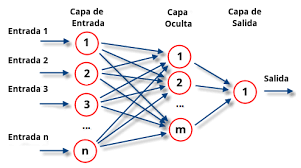


La clase MLP representa un modelo de Perceptrón Multicapa (MLP), que es una red neuronal artificial con múltiples capas. El propósito del MLP es realizar tareas de aprendizaje automático, como clasificación o regresión, mediante la combinación de múltiples capas de unidades o neuronas artificiales.

* def __init__(self, layers): define el constructor de la clase MLP. Toma un
parámetro layers, que debería ser una lista de capas que componen la red neuronal.

* El método __call__ dentro de la clase MLP se utiliza para permitir que una instancia de la clase sea llamada como si fuera una función. Esto significa que puedes tratar a un objeto MLP como una función y pasarle datos de entrada para obtener la salida del modelo.

  Cuando llamas a una instancia de la clase MLP como una función, por ejemplo mlp_instance(input_data), el método __call__ se ejecuta automáticamente. Recibe los datos de entrada input_data y realiza el procesamiento necesario para calcular la salida del MLP.

* Finalmente, return x devuelve la salida del MLP después de pasar por todas las capas.

In [37]:
class MLP:
    def __init__(self, layers):
        # el MLP es una lista de capas
        self.layers = layers
        self.weights = []

    def __call__(self, x):
        # calculamos la salida del modelo aplicando
        # cada capa de manera secuencial
        for layer in self.layers:
            x = layer(x)
            #self.weights.append(layer.w)
        return x

#CLASE LAYER

Layer que representa una capa en una red neuronal.
Layer proporciona una estructura básica para implementar capas en una red neuronal. Cada capa heredará de esta clase y sobrescribirá los métodos __call__, backward y update para realizar las operaciones específicas de la capa.

In [5]:
class Layer():
    def __init__(self):
        self.params = []
        self.grads = []

    '''
    def __call__(self, x): define el método __call__, que permite llamar a una
    instancia de la clase Layer como si fuera una función. Toma un parámetro x,
    que representa los datos de entrada a la capa.
    '''
    def __call__(self, x):
        # por defecto, devolver los inputs
        # cada capa hará algo diferente aquí
        return x
    '''
    def backward(self, grad): define el método backward, que se utiliza para '
    calcular los gradientes de la capa. Recibe un gradiente grad procedente
    de la capa siguiente en la red neuronal.
    '''
    def backward(self, grad):
        # cada capa, calculará sus gradientes
        # y los devolverá para las capas siguientes
        return grad

    '''
    def update(self, params): define el método update, que se utiliza para actualizar
    los parámetros de la capa. Recibe params, que son los nuevos valores
    de los parámetros proporcionados por un optimizador
    '''
    def update(self, params):
        # si hay parámetros, los actualizaremos
        # con lo que nos de el optimizer
        return


#CAPA LINEAL

#CAPA LINEAL

La clase Linear es una subclase de la clase Layer que implementa una capa lineal o una capa de perceptrón en una red neuronal.

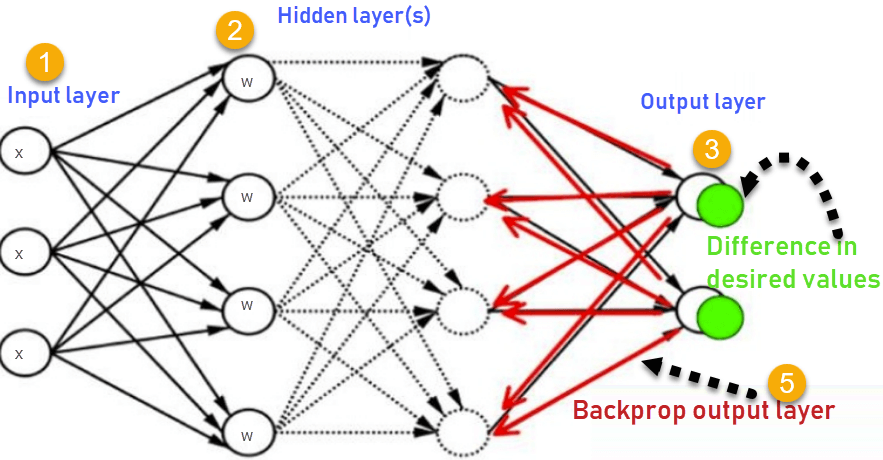

In [6]:
class Linear(Layer):
    '''
    def __init__(self, d_in, d_out): define el constructor de la clase Linear.
    Recibe dos parámetros: d_in, que es la dimensión de entrada de la capa,
    y d_out, que es la dimensión de salida de la capa.
    '''
    def __init__(self, d_in, d_out):
        # pesos de la capa
        self.w = np.random.normal(loc=0.0,
                                  scale=np.sqrt(2/(d_in+d_out)),
                                  size=(d_in, d_out))
        self.b = np.zeros(d_out)
    '''
    def __call__(self, x): sobrescribe el método __call__ de la clase Layer.
    Toma un parámetro x, que representa los datos de entrada a la capa. En este método,
    se realiza el cálculo de la salida de la capa lineal aplicando una multiplicación matricial
    entre los datos de entrada x y los pesos self.w
    '''
    def __call__(self, x):
        self.x = x
        self.params = [self.w, self.b]
        # salida del preceptrón
        return np.dot(x, self.w) + self.b
    '''
    def backward(self, grad_output): sobrescribe el método backward de la clase Layer.
    Recibe un gradiente de salida grad_output procedente de la capa siguiente en la red neuronal.
    En este método, se calculan los gradientes para la capa anterior
    (backward propagation) y los gradientes para actualizar los pesos.
    '''
    def backward(self, grad_output):
        # gradientes para la capa siguiente (BACKPROP)
        grad = np.dot(grad_output, self.w.T)
        self.grad_w = np.dot(self.x.T, grad_output)
        # gradientes para actualizar pesos
        self.grad_b = grad_output.mean(axis=0)*self.x.shape[0]
        self.grads = [self.grad_w, self.grad_b]
        return grad
 #ACTUALIZA LOS PARAMETROS
    def update(self, params):
        self.w, self.b = params

#CLASE RELU

#FUNCIONES DE ACTIVACIÓN

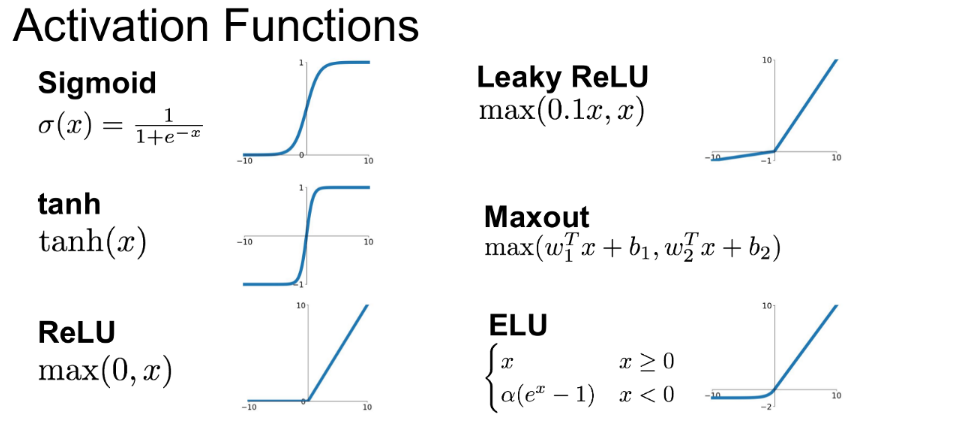

La función de activación no lineal en un perceptrón multicapa es fundamental para permitir que la red neuronal aprenda y represente relaciones no lineales entre las variables de entrada y salida. Si se utilizara únicamente una función de activación lineal, como la identidad, la red estaría limitada a aprender y representar transformaciones lineales de los datos.



In [7]:
'''
ReLU es una subclase de la clase Layer que implementa la función de activación
Rectified Linear Unit (ReLU) en una red neuronal.

          ReLU(x) = max(0, x)

El funcionamiento de ReLU es bastante simple:
--> Si el valor de entrada x es mayor que cero, el resultado de la función ReLU es igual a x.
    En otras palabras, la función ReLU "activa" o mantiene los valores positivos sin cambios.

--> Si el valor de entrada x es igual o menor que cero, el resultado de la función ReLU es cero.
    La función ReLU "desactiva" o establece en cero los valores negativos o cero.
'''
class ReLU(Layer):
    def __call__(self, x):
        self.x = x
        return np.maximum(0, x)

    def backward(self, grad_output):
        grad = self.x > 0
        return grad_output*grad

def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def softmax(x):
    return np.exp(x) / np.exp(x).sum(axis=-1,keepdims=True)
'''
Sigmoid también conocida como función logística, es una función matemática
no lineal que mapea cualquier valor real en un rango de 0 a 1.

      sigmoid(x) = 1 / (1 + exp(-x))

El funcionamiento de la función sigmoide es el siguiente:

--> Si el valor de entrada x es muy negativo, la función sigmoide se acerca a 0.
    Esto significa que los valores muy negativos se mapean a una probabilidad cercana a cero.
--> Si el valor de entrada x es muy positivo, la función sigmoide se acerca a 1.
    Esto significa que los valores muy positivos se mapean a una probabilidad cercana a uno.
--> Si el valor de entrada x es cero, la función sigmoide devuelve 0.5, lo que indica una probabilidad neutra.
'''
class Sigmoid(Layer):
    def __call__(self, x):
        self.x = x
        return sigmoid(x)

    def backward(self, grad_output):
        grad = sigmoid(self.x)*(1 - sigmoid(self.x))
        return grad_output*grad

#OPTIMIZADOR

#OPTIMIZADOR

SGD (Descenso de Gradiente Estocástico) es un optimizador utilizado en el entrenamiento de redes neuronales.

In [8]:
class SGD():
    '''
    def __init__(self, net, lr): es el constructor de la clase SGD. Recibe dos
    parámetros: net, que representa la red neuronal que se va a optimizar,
    y lr, que es la tasa de aprendizaje (learning rate)
    '''
    def __init__(self, net, lr):
        self.net = net
        self.lr = lr
    '''
    def update(self): es el método encargado de realizar la actualización de los
    pesos de la red utilizando el algoritmo de descenso de gradiente estocástico.
    En cada iteración del entrenamiento, se recorren todas las capas de la red y se actualizan los pesos de cada capa.
    '''
    def update(self):
        for layer in self.net.layers:
            layer.update([
                params - self.lr*grads
                for params, grads in zip(layer.params, layer.grads)
            ])

#FUNCIONES DE PERDIDA

#FUNCIONES DE PERDIDA

Las funciones de pérdida (loss functions, en inglés) son utilizadas en problemas de aprendizaje automático (machine learning) y optimización para medir cuán bien se están realizando las predicciones de un modelo en comparación con los valores reales.

La **función backward** en la **clase Loss** juega un papel importante en la propagación
del gradiente a través de la red neuronal durante el proceso de entrenamiento.
**Ayuda a actualizar los parámetros de la red neuronal** utilizando el gradiente
calculado a partir de la función de pérdida. **Esto permite ajustar los pesos y sesgos de las neuronas para mejorar la precisión y minimizar la pérdida** durante el entrenamiento.

In [9]:
'''
La clase Loss representa una función de pérdida (o función de costo)
utilizada en el entrenamiento de redes neuronales.
'''
class Loss():
    def __init__(self, net):
        self.net = net

    def backward(self):
        # derivada de la loss function con respecto
        # a la salida del MLP
        grad = self.grad_loss()
        # BACKPROPAGATION
        for layer in reversed(self.net.layers):
            grad = layer.backward(grad)

'''La clase CrossEntropy hereda de la clase Loss y define una función
de pérdida llamada Cross Entropy loss, utilizada comúnmente en problemas
de clasificación multiclase en redes neuronales.

 Clase CrossEntropy encapsula la lógica para calcular la pérdida
 y el gradiente de la Cross Entropy loss en un problema de clasificación multiclase.
'''
class CrossEntropy(Loss):
    def __call__(self, output, target):
        self.output, self.target = output, target
        logits = output[np.arange(len(output)), target.astype(int)]
        loss = - logits + np.log(np.sum(np.exp(output), axis=-1))
        loss = loss.mean()
        return loss

    def grad_loss(self):
        answers = np.zeros_like(self.output)
        answers[np.arange(len(self.output)), self.target.astype(int)] = 1
        return (- answers + softmax(self.output)) / self.output.shape[0]

#CLASIFICACION MULTICLASE

**Dataset Nombre:** Clasificacion de Virus Informatico


---


**URL:** https://www.kaggle.com/datasets/datamunge/virusmnist


---

**Descripcion**

*el conjunto de datos "VirusMNIST" disponible en Kaggle consta de imágenes de virus en un tamaño de 32x32 píxeles. Cada imagen representa un virus y está asociada a una etiqueta o clase que indica el tipo de virus representado.

Gracias por la corrección y la actualización de la información. Si deseas acceder al conjunto de datos VirusMNIST con imágenes de 32x32 píxeles, puedes visitar el siguiente enlace en Kaggle: VirusMNIST en Kaggle

Leemos el dataset
Url dataset:

In [10]:
train = pd.read_csv('/content/drive/MyDrive/datasets/datasetExaFinal/virus/train.csv')

In [11]:
train = train.drop('hash', axis=1)
train

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
0,3,212,1,77,204,137,117,139,161,199,...,0,0,0,0,0,0,0,0,0,0
1,0,0,19,3,233,127,0,70,1,233,...,225,104,28,233,150,115,173,126,27,64
2,1,0,181,232,0,0,141,133,255,221,...,58,116,223,203,183,56,59,62,50,51
3,5,130,109,153,224,84,51,235,254,64,...,31,183,113,255,113,31,183,113,255,113
4,1,81,141,255,232,0,198,247,221,0,...,34,61,69,36,48,133,61,147,178,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48417,6,43,0,0,46,236,144,238,104,241,...,95,0,4,100,99,110,152,1,0,100
48418,9,4,64,85,45,0,2,139,16,217,...,158,171,228,7,93,181,95,247,123,221
48419,6,40,75,116,118,221,224,255,195,88,...,133,84,190,55,89,207,97,115,203,57
48420,2,0,0,207,0,0,0,121,0,109,...,254,231,180,38,170,235,20,85,179,241


#Cantidad de Datos por Clase

In [12]:
dataC=train.groupby('label').count()
dataC.iloc[:, 1]

label
0     2341
1     7188
2     2832
3     2228
4      738
5     6206
6    14374
7     7003
8     2398
9     3114
Name: pixel2, dtype: int64

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48422 entries, 0 to 48421
Columns: 1025 entries, label to pixel1024
dtypes: int64(1025)
memory usage: 378.7 MB


#Numero de Clases

In [14]:
value = list(train["label"].unique())
print("numero de clases",value)

numero de clases [3, 0, 1, 5, 6, 8, 2, 7, 9, 4]


#Resumen Estadistico del DataSet

La función data.describe() se utiliza para generar un resumen estadístico.
* Recuento (count): El número de valores no nulos en cada columna.
* Media (mean): El valor promedio de los valores en cada columna.
* Desviación estándar (std): La medida de dispersión de los valores en cada columna.
* Valor mínimo (min): El valor mínimo en cada columna.
* Cuartiles (25%, 50%, 75%): Los valores que dividen la distribución de los datos en cuatro partes iguales.
* Valor máximo (max): El valor máximo en cada columna.


In [15]:
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel1015,pixel1016,pixel1017,pixel1018,pixel1019,pixel1020,pixel1021,pixel1022,pixel1023,pixel1024
count,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,...,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.000000,48422.00000
mean,4.873673,89.559250,99.486742,102.570361,96.744042,99.226034,95.226323,99.096526,99.123745,101.026186,...,93.798191,93.229255,95.003717,90.993474,91.884949,91.547561,87.724609,88.453719,94.427863,89.82510
std,2.577520,86.029733,89.266138,89.959453,87.909454,88.085383,86.801092,88.860804,88.442139,87.775476,...,81.580102,81.787610,80.796666,80.500245,82.089551,81.376400,81.138273,78.261799,82.203055,80.38438
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2.000000,1.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,8.000000,...,14.000000,9.000000,16.000000,7.000000,11.000000,11.000000,9.000000,11.000000,13.000000,11.00000
50%,6.000000,76.000000,86.000000,93.000000,81.000000,85.000000,81.000000,85.000000,86.000000,94.000000,...,70.000000,75.000000,81.000000,67.000000,66.000000,67.000000,61.000000,65.000000,77.000000,67.00000
75%,7.000000,141.000000,180.000000,191.000000,168.000000,165.000000,157.000000,178.000000,172.000000,173.000000,...,158.000000,163.000000,158.000000,158.000000,158.000000,155.000000,152.000000,146.000000,165.000000,151.00000
max,9.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000


#Histograma
Generar un histograma de la columna "label"

Un histograma es una representación visual de la distribución de los datos


<Axes: >

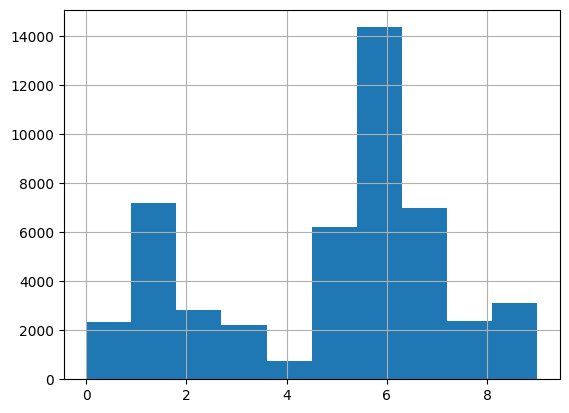

In [16]:
train["label"].hist()

In [17]:
train = train.to_numpy()#convertimos el dataframe en un dataset tipo numpy


In [18]:
train.shape

(48422, 1025)

# * Asignacion de datos a X y Y,
# * Normalizamos los datos

In [19]:

X = train[:7000, 1:]  # 1 al 1024 caracteristicas
Y = train[:7000, 0] # y clases

# normalización datos
X_mean, X_std = X.mean(axis=0), X.std(axis=0)
X_norm = (X - X_mean) / X_std

X.shape, Y.shape

((7000, 1024), (7000,))

#Entrenamos el Algoritmo

DEFINIMOS LAS ENTRDAS, CAPAS OCULTAS, EL TIPO DE FUNCION PERDIDAD EN ESTE CASO UTILIZAMOS CROSSENTROPY YA QUE NUESTRO MODELO ES MULTICLASE

In [38]:
D_in, H, D_out = 1024, 50, 10
mlp = MLP([
    Linear(D_in, H),# CAPA ENTRADA
    ReLU(),
    Linear(H, H),  #CAPAS OCULTAS
    ReLU(),
    Linear(H, D_out)#CAPA SALIDA
])

optimizer = SGD(mlp, lr=0.02)
loss = CrossEntropy(mlp)

epochs = 100
batch_size = 20

batches = len(X) // batch_size
log_each = 20
l = []
for e in range(1,epochs+1):
    _l = []
    for b in range(batches):
        x = X_norm[b*batch_size:(b+1)*batch_size]
        y = Y[b*batch_size:(b+1)*batch_size]
        y_pred = mlp(x)
        _l.append(loss(y_pred, y))
        loss.backward()
        optimizer.update()
    l.append(np.mean(_l))
    if not e % log_each:
        print(f'Epoch {e}/{epochs}, Loss: {np.mean(l):.4f}')

Epoch 20/100, Loss: 0.0914
Epoch 40/100, Loss: 0.0466
Epoch 60/100, Loss: 0.0313
Epoch 80/100, Loss: 0.0236
Epoch 100/100, Loss: 0.0189


#AQUI TENEMOS LOS MEJORES THETHA O ULTIMOS THETHAS

In [41]:
# Acceder a la última capa lineal en la lista de capas
ultimo_layer = mlp.layers[-1]

# Obtener los pesos 'w' de la última capa lineal
Ulthetha = ultimo_layer.w
Ulthetha

array([[-0.10998064, -0.35243826,  0.07075332, -0.36894774,  0.09181456,
        -0.01874941,  0.29910179,  0.2388967 ,  0.28011764, -0.02985144],
       [-0.27900245, -0.38291407,  0.15940994,  0.08783613, -0.10784624,
         0.29266127,  0.49957189, -0.07379859,  0.20492684,  0.05930822],
       [ 0.55177943, -0.19528491, -0.00209188, -0.25802686,  0.25677121,
        -0.15694284, -0.3733378 ,  0.28202117,  0.31294201,  0.08613446],
       [-0.32110532,  0.19411216,  0.06677785,  0.0715175 ,  0.00180279,
        -0.25755822, -0.19171922,  0.60115409,  0.06659699,  0.17578625],
       [ 0.49356772,  0.10737335, -0.20693746, -0.36317753,  0.19569794,
        -0.07581092,  0.24424965, -0.18592491,  0.04303874, -0.06510306],
       [-0.01781583,  0.23011797,  0.18893469, -0.27813423,  0.04308155,
        -0.52240769,  0.47712891, -0.10549592, -0.21003845,  0.43779876],
       [ 0.31120287,  0.40621078,  0.09621435, -0.06504894, -0.17866585,
         0.07200364,  0.13443213, -0.42078176

Hacemos las Prediccion con el dataset TEST, este dataset es de prueba ya que para el entrenamiento se uso otro

In [42]:

def evaluate(x):
    x = (x - X_mean) / X_std
    y = mlp(x)
    y_probas = softmax(y)
    return np.argmax(y_probas, axis=1)

In [43]:
test = pd.read_csv('/content/drive/MyDrive/datasets/datasetExaFinal/virus/test.csv')
test = test.drop('hash', axis=1)

In [44]:
test = test.to_numpy()

In [45]:
x_test = test[:, 1:]
y_test= test[:, 0]
y_pred=evaluate(x_test)

In [46]:
y_pred

array([2, 6, 9, ..., 7, 5, 4])

#METRICAS PARA CLASIFICACION
Las métricas para clasificación son medidas cuantitativas utilizadas para evaluar el rendimiento de un modelo de clasificación. Estas métricas proporcionan información sobre la capacidad del modelo para realizar predicciones precisas y correctas en problemas de clasificación, donde el objetivo es asignar una etiqueta de clase a una muestra o instancia determinada.

* **PRECISION**.


---


  Muestra la predicción del modelo y los valores reales de una muestra de datos, y luego calcula y muestra el porcentaje de relación o precisión entre las predicciones y los valores reales.







In [47]:
print("Prediccion del Modelo: ")
print(y_pred)
print("Valores Reales: ")
print(y_test)

total_pred = len(y_pred)
parecidos = np.sum(y_pred == y_test)
presicionPorc = (parecidos/total_pred)*100

print("Porcentaje de relacion: ", f"{presicionPorc:.2f}%")

Prediccion del Modelo: 
[2 6 9 ... 7 5 4]
Valores Reales: 
[2 6 9 ... 7 5 4]
Porcentaje de relacion:  88.52%


In [48]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8851937536148062

#Matrix de Confuncion

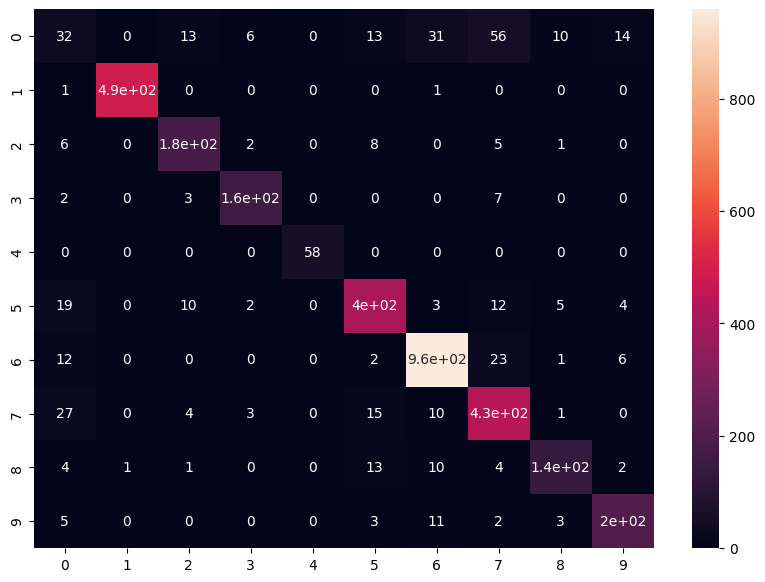

In [49]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in range(0,10)], columns = [i for i in range(0,10)])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)
plt.show()

#Precision - Recall



* Precisión (Precision):
La precisión es una medida que indica la proporción de instancias clasificadas correctamente como positivas (verdaderos positivos) con respecto al total de instancias clasificadas como positivas (verdaderos positivos más falsos positivos).
* Recall (Recall o Sensibilidad):
El recall es una medida que indica la proporción de instancias positivas clasificadas correctamente (verdaderos positivos) con respecto al total de instancias positivas reales (verdaderos positivos más falsos negativos).



In [53]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# y_true: etiquetas reales de las muestras
# y_pred: etiquetas predichas por el modelo

# Calcular la precisión
precision = precision_score(y_test, y_pred, average='macro')

# Calcular la recuperación (recall)
recall = recall_score(y_test, y_pred, average='macro')

print("Precisión:", precision)
print("Recuperación:", recall)


Precisión: 0.8444433622440723
Recuperación: 0.8407665165473789
